<a href="https://colab.research.google.com/github/savindu29/Save-hearts/blob/feat%2Fsavindu/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 


<ipython-input-47-62d5796c98c4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
def parser(x):
 return datetime.strptime('20'+x, '%Y-%m')

Date
2017-01-01    35116
2017-02-01    35946
2017-03-01    32531
2017-04-01    29574
2017-05-01    38898
Name: Amount, dtype: int64


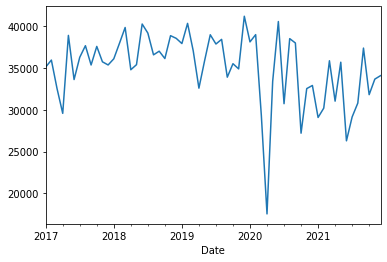

In [ ]:
series = read_csv('/content/drive/MyDrive/data/data_1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()


<ipython-input-73-c2831dec7158>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


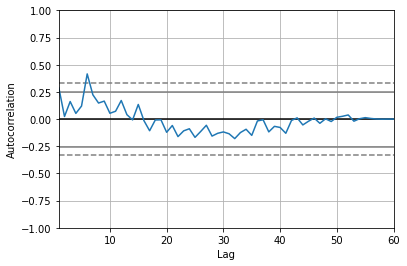

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
def parser(x):
 return datetime.strptime('20'+x, '%Y-%m')
 
series = read_csv('/content/drive/MyDrive/data/data_1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

<ipython-input-74-b950f7f4f7cc>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# load dataset
def parser(x):
 return datetime.strptime('20'+x, '%Y-%m')
series = read_csv('/content/drive/MyDrive/data/data_1.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

In [ ]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

In [ ]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   60
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -578.631
Date:                Sat, 11 Feb 2023   AIC                           1169.261
Time:                        14:55:59   BIC                           1181.726
Sample:                    01-31-2017   HQIC                          1174.127
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4241      0.054     -7.813      0.000      -0.530      -0.318
ar.L2         -0.4543      0.066     -6.935      0.000      -0.583      -0.326
ar.L3         -0.3094      0.084     -3.682      0.0

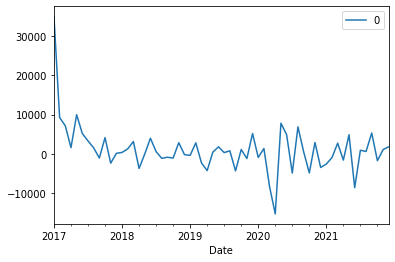

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

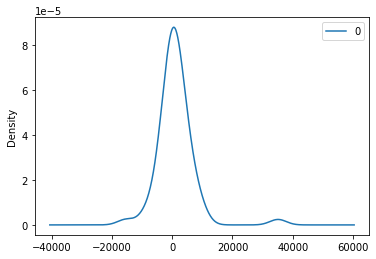

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                  0
count     60.000000
mean    1106.508568
std     6193.059767
min   -15352.315079
25%    -1176.390254
50%      573.252136
75%     2942.344094
max    35116.000000


In [ ]:
#Rolling Forecast ARIMA Model

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-84-fe7cd702419c>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# load dataset
def parser(x):
 return datetime.strptime('20'+x, '%Y-%m')
series = read_csv('/content/drive/MyDrive/data/data_1.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

In [ ]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=31533.672921, expected=17550.000000


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=17538.092754, expected=33403.000000
predicted=35209.301337, expected=40557.000000
predicted=36813.389557, expected=30730.000000
predicted=28339.906193, expected=38512.000000
predicted=39307.855448, expected=37989.000000
predicted=34049.201589, expected=27203.000000
predicted=28881.031074, expected=32536.000000
predicted=36381.572711, expected=32909.000000
predicted=31423.996058, expected=29083.000000
predicted=31007.192465, expected=30200.000000
predicted=32647.525654, expected=35865.000000
predicted=33099.398100, expected=31035.000000
predicted=30614.242533, expected=35692.000000
predicted=35479.471274, expected=26291.000000
predicted=27921.282189, expected=29143.000000
predicted=30392.097370, expected=30803.000000
predicted=31708.404303, expected=37380.000000
predicted=33695.045764, expected=31810.000000
predicted=32568.032596, expected=33670.000000
predicted=32195.619696, expected=34082.000000


In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6412.245


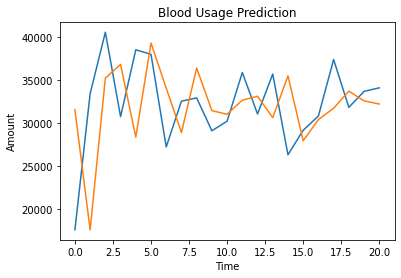

In [98]:
# plot forecasts against actual outcomes
pyplot.plot(test,  label='Actual')
pyplot.plot(predictions, label='Predicted')
pyplot.title('Blood Usage Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Amount')
pyplot.show()